In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [10]:
x = df['TotalCharges'][488]
for i in range(len(df)):
    if df['TotalCharges'][i] == x:
        df['TotalCharges'][i] = np.nan

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [12]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('str')

In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


<AxesSubplot:ylabel='TotalCharges'>

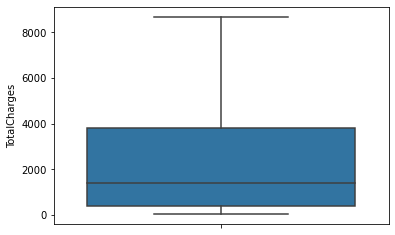

In [16]:
sns.boxplot(y = df['TotalCharges'])

<AxesSubplot:ylabel='tenure'>

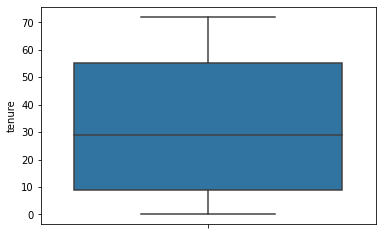

In [17]:
sns.boxplot(y = df['tenure'])

<AxesSubplot:ylabel='MonthlyCharges'>

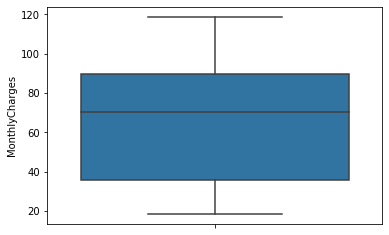

In [18]:
sns.boxplot(y = df['MonthlyCharges'])

In [19]:
df['TotalCharges'] = df['TotalCharges'].fillna(2283.3)

In [20]:
df.drop(['customerID'], axis = 1, inplace = True)

In [21]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print(df[col].value_counts())
        print()

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes     

In [22]:
df['Churn'].value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

## Visualization

In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

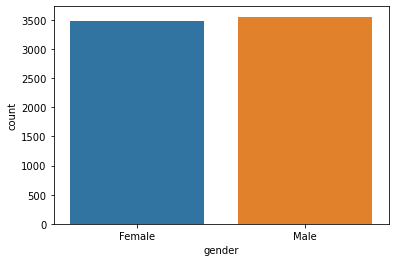

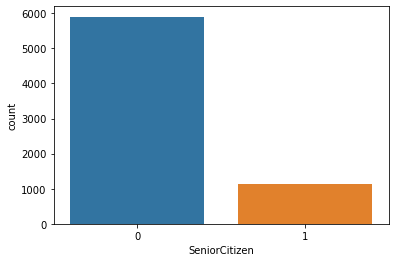

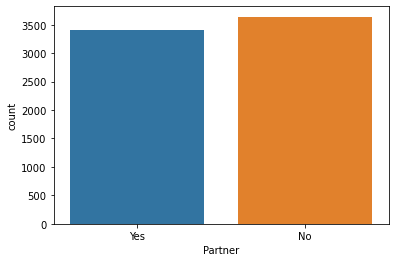

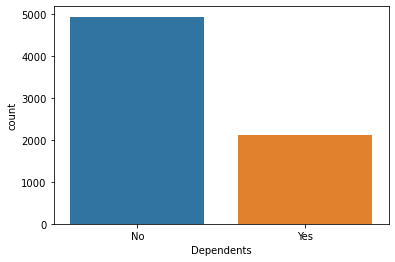

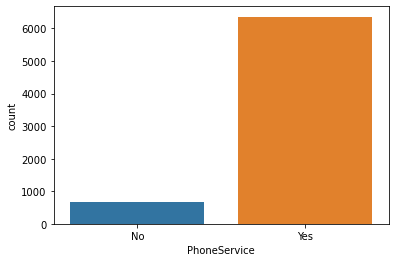

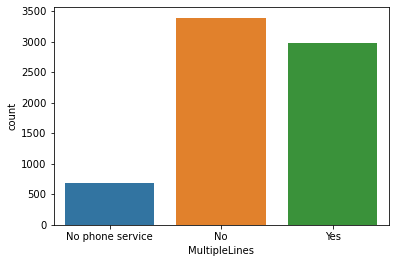

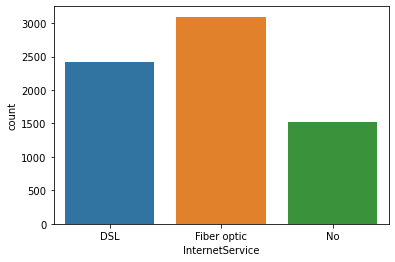

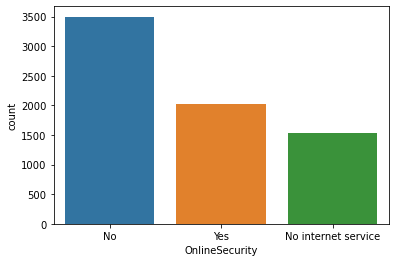

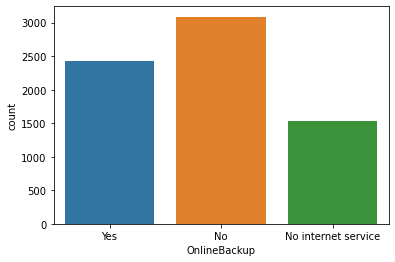

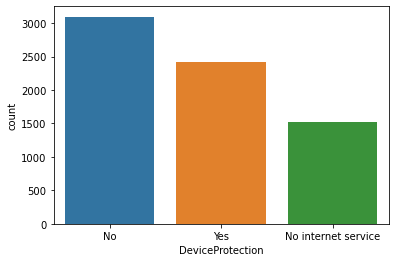

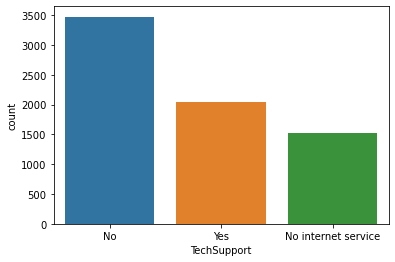

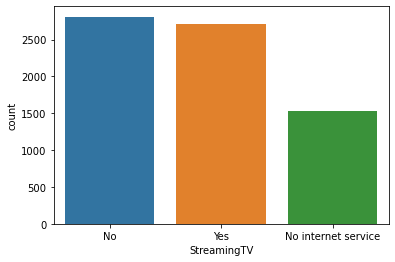

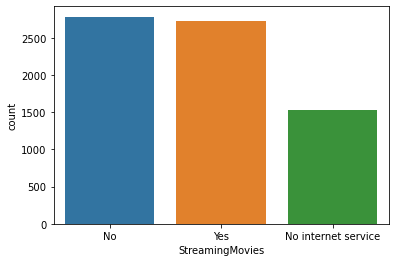

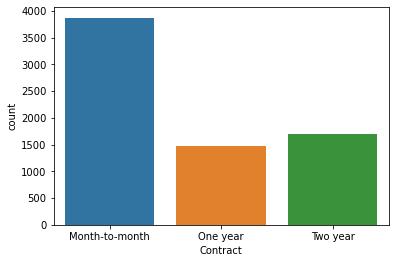

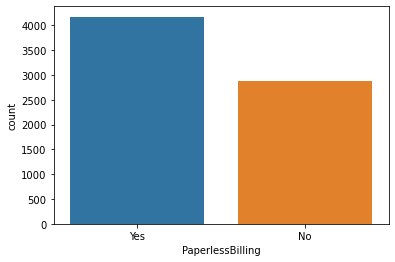

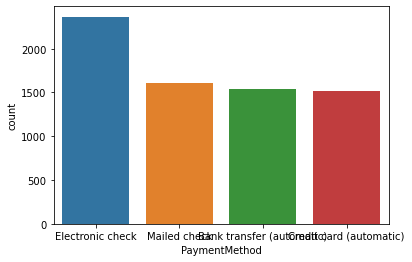

In [24]:
for col in df.columns:
    if col != "Churn" and df[col].dtypes == 'object':
        sns.countplot(x = col, data = df)
        plt.show()

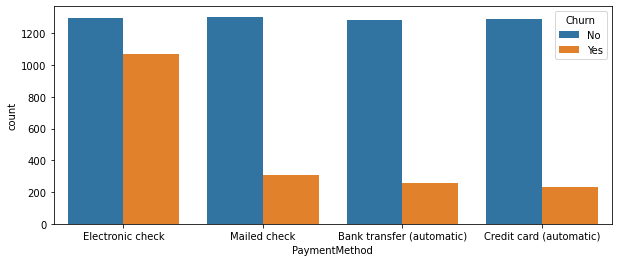

In [25]:
plt.figure(figsize= (10, 4))
sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
plt.show()

In [26]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

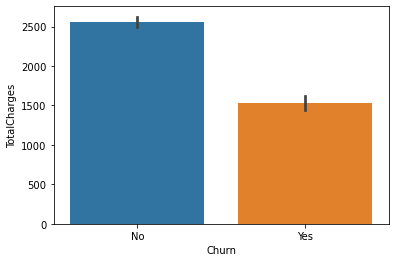

In [28]:
sns.barplot(x = 'Churn', y = 'TotalCharges', data = df)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

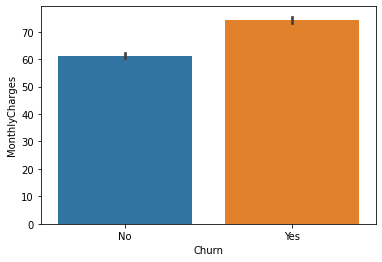

In [29]:
sns.barplot(x = 'Churn', y = 'MonthlyCharges', data = df)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

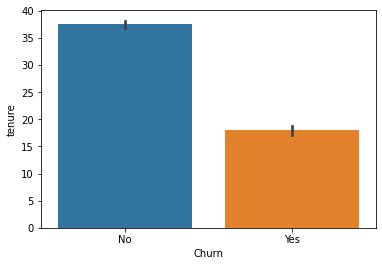

In [30]:
sns.barplot(x = 'Churn', y = 'tenure', data = df)

In [31]:
# df['Churn1'] = list(map(lambda x: 1 if x=='Yes' else 0, list(df['Churn'])))

In [32]:
df['Churn'] = df['Churn'].replace({'Yes' : 1, 'No' : 0})

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [34]:
df.groupby(['gender'])['Churn'].mean().to_frame()

,Churn
gender,
Female,0.269209
Male,0.261603


In [35]:
for col in df.columns:
    if col != 'Churn' and  df[col].dtypes == 'object':
        print( df.groupby([col])['Churn'].mean().to_frame(), end = '\n' )

           Churn
gender          
Female  0.269209
Male    0.261603
                  Churn
SeniorCitizen          
0              0.236062
1              0.416813
            Churn
Partner          
No       0.329580
Yes      0.196649
               Churn
Dependents          
No          0.312791
Yes         0.154502
                 Churn
PhoneService          
No            0.249267
Yes           0.267096
                     Churn
MultipleLines             
No                0.250442
No phone service  0.249267
Yes               0.286099
                    Churn
InternetService          
DSL              0.189591
Fiber optic      0.418928
No               0.074050
                        Churn
OnlineSecurity               
No                   0.417667
No internet service  0.074050
Yes                  0.146112
                        Churn
OnlineBackup                 
No                   0.399288
No internet service  0.074050
Yes                  0.215315
                       

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

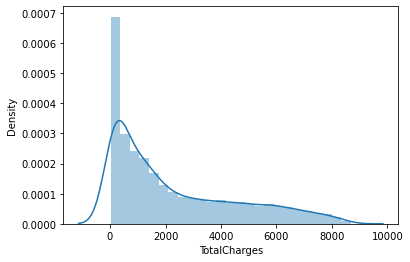

In [36]:
sns.distplot(a = df['TotalCharges'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

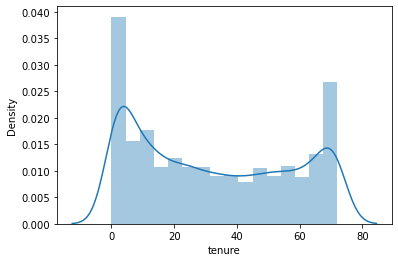

In [37]:
sns.distplot(a = df['tenure'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

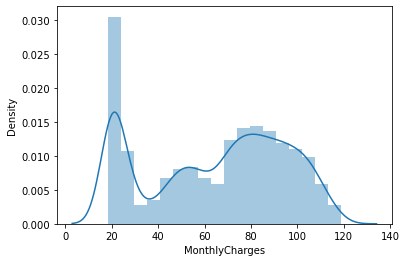

In [38]:
sns.distplot(df['MonthlyCharges'])

In [39]:
for col in df.columns:
    if df[col].dtypes != 'object' and col != 'Churn':
        print(df.groupby(['Churn'])[col].mean().to_frame(), end = '\n\n')

          tenure
Churn           
0      37.569965
1      17.979133

       MonthlyCharges
Churn                
0           61.265124
1           74.441332

       TotalCharges
Churn              
0       2554.765771
1       1531.796094



## Modelling

In [85]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [86]:
# one hot encoding
X = pd.get_dummies(df, columns = cat_features, drop_first = True )

In [87]:
# feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()

In [88]:
ten = sc.fit_transform(df[['tenure']])
mc = sc.fit_transform(df[['MonthlyCharges']])
tc = sc.fit_transform(df[['TotalCharges']])

In [89]:
X['tenure'] = ten
X['MonthlyCharges'] = mc
X['TotalCharges'] = tc

In [90]:
X

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.277445,-1.160323,-0.994971,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0.066327,-0.259629,-0.173876,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,-1.236724,-0.362660,-0.960399,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0.514251,-0.746535,-0.195400,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,-1.236724,0.197365,-0.941193,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.129281,0,1,0,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,1.613701,1.277533,2.242808,0,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,-0.870241,-1.168632,-0.855182,0,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,-1.155283,0.320338,-0.872777,1,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [91]:
X = X.drop(['Churn'], axis = 1) # independent variables or features
Y = df['Churn']  # target

In [92]:
X.shape

(7043, 30)

In [93]:
# splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [94]:
# import classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [95]:
# instance of the classification class
lr_classifier = LogisticRegression()
knn_classifier = KNeighborsClassifier()
dc_classifier = DecisionTreeClassifier(criterion = 'entropy')
rf_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
nb_classifier = GaussianNB()
svm_classifier = SVC()

In [51]:
classifier = {'Logistic_Regression' : lr_classifier,
              'KNN' : knn_classifier, 
              'Decision_Tree' : dc_classifier, 
              'Random_Forest' : rf_classifier, 
              'Naive_Bayes' : nb_classifier}

In [52]:
for model, clf in classifier.items():
    print('{} : {}'.format(model, clf))

Logistic_Regression : LogisticRegression()
KNN : KNeighborsClassifier()
Decision_Tree : DecisionTreeClassifier(criterion='entropy')
Random_Forest : RandomForestClassifier(criterion='entropy')
Naive_Bayes : GaussianNB()


In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
scores = ['accuracy', 'roc_auc', 'precision', 'recall']
for model, clf in classifier.items():
    print(model, end = '\n')
    for score in scores:
        accuracies = cross_val_score(estimator = clf, X = X_train, y = Y_train, scoring = score, cv = 10)
        print('{} : {}'.format(score, accuracies.mean()) )
    print('\n')

Logistic_Regression
accuracy : 0.8012027134273081
roc_auc : 0.8409914918631491
precision : 0.655886266704133
recall : 0.5340939597315436


KNN
accuracy : 0.7602014915032185
roc_auc : 0.7773008702565785
precision : 0.5517472724976236
recall : 0.5207382550335571


Decision_Tree
accuracy : 0.7348251514807956
roc_auc : 0.6634834276680014
precision : 0.5016673910365201
recall : 0.5133780760626399


Random_Forest
accuracy : 0.7850471763475807
roc_auc : 0.8224042380457017
precision : 0.6295071900386895
recall : 0.46789261744966437


Naive_Bayes
accuracy : 0.6565533552523839
roc_auc : 0.8153122831172072
precision : 0.4286361724286989
recall : 0.8743176733780761




## Random Forest

In [96]:
# Random Forest
rf_classifier.fit(X_train, Y_train)

Y_pred = rf_classifier.predict(X_test)

# making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
print(confusion_matrix(Y_test, Y_pred))
print('accuracy :', accuracy_score(Y_test, Y_pred))
print('precision :', precision_score(Y_test, Y_pred))
print('recall :', recall_score(Y_test, Y_pred))

# AUC score
from sklearn.metrics import roc_auc_score
prediction = rf_classifier.predict_proba(X_test)
print('auc score :', roc_auc_score(Y_test , prediction[: , 1]))

[[943  93]
 [205 168]]
accuracy : 0.7885024840312278
precision : 0.6436781609195402
recall : 0.450402144772118
auc score : 0.8396777666214663


,feature,performance
29,TotalCharges,0.192413
28,MonthlyCharges,0.169937
27,tenure,0.168022
26,Contract_Two year,0.041371
25,InternetService_Fiber optic,0.032791
24,PaymentMethod_Electronic check,0.031000
23,gender_Male,0.028948
22,Partner_Yes,0.026380
21,PaperlessBilling_Yes,0.026220
20,OnlineSecurity_Yes,0.023568


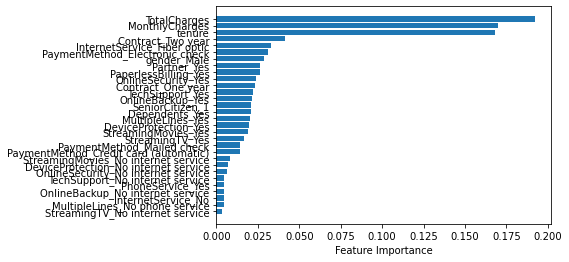

In [97]:
# feature importance
sorted_idx = rf_classifier.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf_classifier.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")

performances = pd.DataFrame({'feature' : X.columns[sorted_idx], 'performance' : rf_classifier.feature_importances_[sorted_idx]})
performances.sort_values(by = ['performance'], ascending = False)

In [100]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [150,200,250,300], 'max_depth':[15,20,25]}
rf_clf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters, n_jobs = -1, cv = 10, scoring = 'roc_auc')
rf_clf.fit(X, Y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]},
             scoring='roc_auc')

In [101]:
print(rf_clf.best_params_)
print(rf_clf.best_score_)

{'max_depth': 15, 'n_estimators': 250}
0.8334648068035477


## Naive Bayes

In [58]:
# Naive Bayes
nb_classifier.fit(X_train, Y_train)

Y_pred = nb_classifier.predict(X_test)

# making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
print(confusion_matrix(Y_test, Y_pred))
print('accuracy :', accuracy_score(Y_test, Y_pred))
print('precision :', precision_score(Y_test, Y_pred))
print('recall :', recall_score(Y_test, Y_pred))

# AUC score
from sklearn.metrics import roc_auc_score
prediction = nb_classifier.predict_proba(X_test)
print('auc score :', roc_auc_score(Y_test , prediction[: , 1]))

[[605 431]
 [ 40 333]]
accuracy : 0.6657203690560681
precision : 0.43586387434554974
recall : 0.8927613941018767
auc score : 0.8377278561594915


,feature,performance
29,Contract_Two year,0.026260
28,Contract_One year,0.024840
27,OnlineSecurity_Yes,0.007097
26,TechSupport_Yes,0.005110
25,tenure,0.004684
24,TotalCharges,0.002839
23,PaymentMethod_Electronic check,0.002555
22,InternetService_Fiber optic,0.001703
21,Dependents_Yes,0.001278
20,OnlineBackup_Yes,0.000994


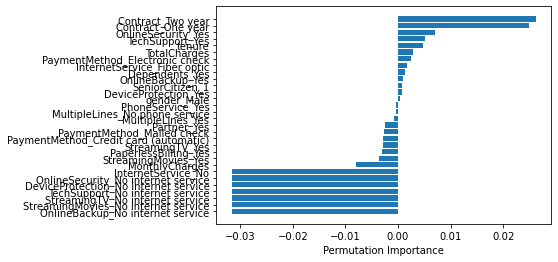

In [59]:
# feature importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(nb_classifier, X_test, Y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

performances = pd.DataFrame({'feature' : X.columns[sorted_idx], 'performance' : perm_importance.importances_mean[sorted_idx]})
performances.sort_values(by = ['performance'], ascending = False)

## Catboost

In [78]:
X = df.drop(['Churn'], axis = 1)
Y = df['Churn']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [80]:
# Cat Boost
from catboost import CatBoostClassifier
cb_classifier = CatBoostClassifier(
                         verbose = 50,
                        eval_metric='AUC',
                        n_estimators = 400,
                        learning_rate = 0.1,
                        random_state=42)

In [81]:
cb_classifier.fit(X = X_train, y = Y_train, cat_features = cat_features)

0:	total: 40.1ms	remaining: 16s
50:	total: 1.39s	remaining: 9.48s
100:	total: 2.61s	remaining: 7.73s
150:	total: 4.08s	remaining: 6.72s
200:	total: 5.47s	remaining: 5.41s
250:	total: 6.86s	remaining: 4.07s
300:	total: 8.29s	remaining: 2.73s
350:	total: 9.7s	remaining: 1.35s
399:	total: 11s	remaining: 0us


In [82]:
Y_pred = cb_classifier.predict(X_test)

# making confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
print(confusion_matrix(Y_test, Y_pred))
print('accuracy :', accuracy_score(Y_test, Y_pred))
print('precision :', precision_score(Y_test, Y_pred))
print('recall :', recall_score(Y_test, Y_pred))

# AUC score
from sklearn.metrics import roc_auc_score
prediction = cb_classifier.predict_proba(X_test)
print('auc score :', roc_auc_score(Y_test , prediction[: , 1]))

[[931 105]
 [169 204]]
accuracy : 0.8055358410220014
precision : 0.6601941747572816
recall : 0.546916890080429
auc score : 0.855771320918774


,feature,performance
18,tenure,15.433662
17,MonthlyCharges,14.044041
16,TotalCharges,13.612224
15,Contract,11.164070
14,PaymentMethod,6.160351
13,InternetService,5.871087
12,OnlineSecurity,4.812699
11,MultipleLines,4.486350
10,TechSupport,3.793725
9,StreamingMovies,3.390184


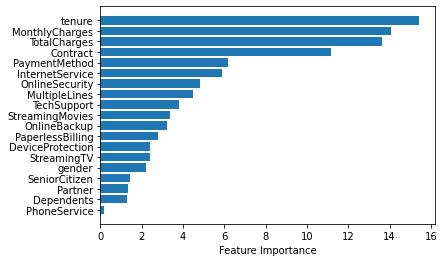

In [83]:
# feature importance
sorted_idx = cb_classifier.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], cb_classifier.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")

performances = pd.DataFrame({'feature' : X.columns[sorted_idx], 'performance' : cb_classifier.feature_importances_[sorted_idx]})
performances.sort_values(by = ['performance'], ascending = False)

,feature,performance
18,tenure,0.039886
17,Contract,0.024131
16,TotalCharges,0.020298
15,InternetService,0.019021
14,MonthlyCharges,0.006529
13,OnlineSecurity,0.005962
12,TechSupport,0.005820
11,DeviceProtection,0.002839
10,PaperlessBilling,0.002413
9,Partner,0.002413


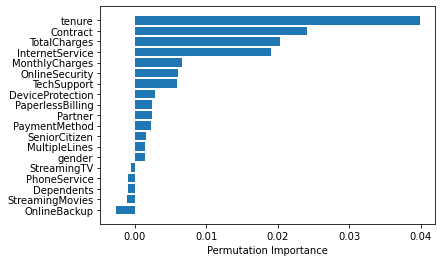

In [84]:
# feature importance using permutation importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(cb_classifier, X_test, Y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

performances = pd.DataFrame({'feature' : X.columns[sorted_idx], 'performance' : perm_importance.importances_mean[sorted_idx]})
performances.sort_values(by = ['performance'], ascending = False)